#### March 7, 2024 --> New GALFIT output parameters! 

Both masking and the treatment of group galaxies differ from the previous routine. This notebook will evaluate to what degree the model parameters differ as well.

In [222]:
#no more error text.
import warnings
warnings.filterwarnings('ignore')

In [232]:
%run newgalfitparams.py

USAGE: 


In [233]:
cat = catalogs()

Final subsample size (inc. SNR, t-type, magphys, and W1+W3 galfit flags): 518
magflag+SNR+t-type only: 701

for full catalog (galfit errors only):
fraction galaxies with w1 galfit errors (old): 0.220
fraction galaxies with w1 galfit errors (new): 0.154
fraction galaxies with w3 galfit errors (old): 0.565
fraction galaxies with w3 galfit errors (new): 0.601

for subsample galaxies...(applying SNR flag and galfit error flag):
fraction galaxies with w1 galfit errors (old): 0.006
fraction galaxies with w1 galfit errors (new): 0.007
fraction galaxies with w3 galfit errors (old): 0.028
fraction galaxies with w3 galfit errors (new): 0.036


frac points without r-band errors (/518): 0.971


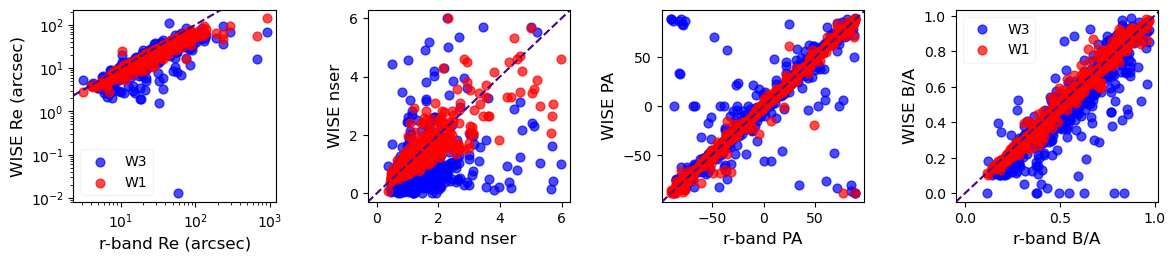

In [234]:
cat.rbandcomp()

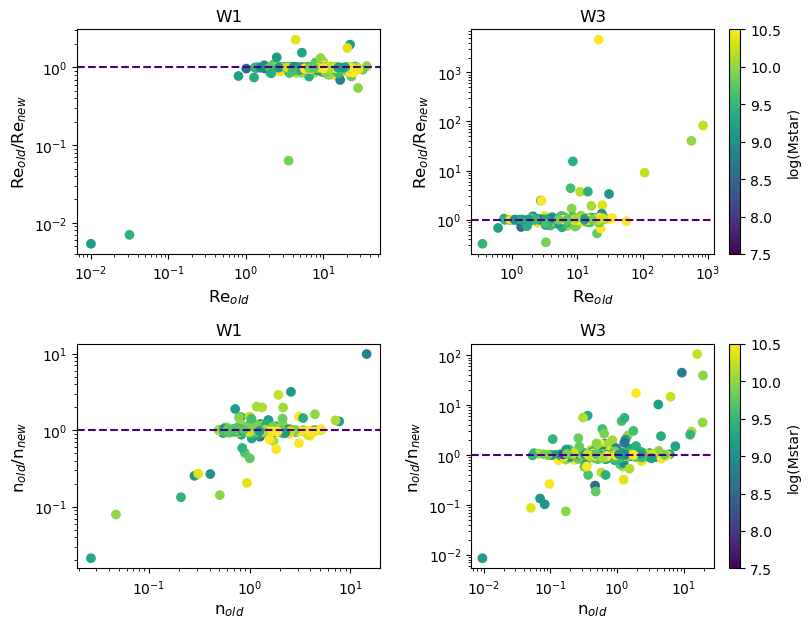

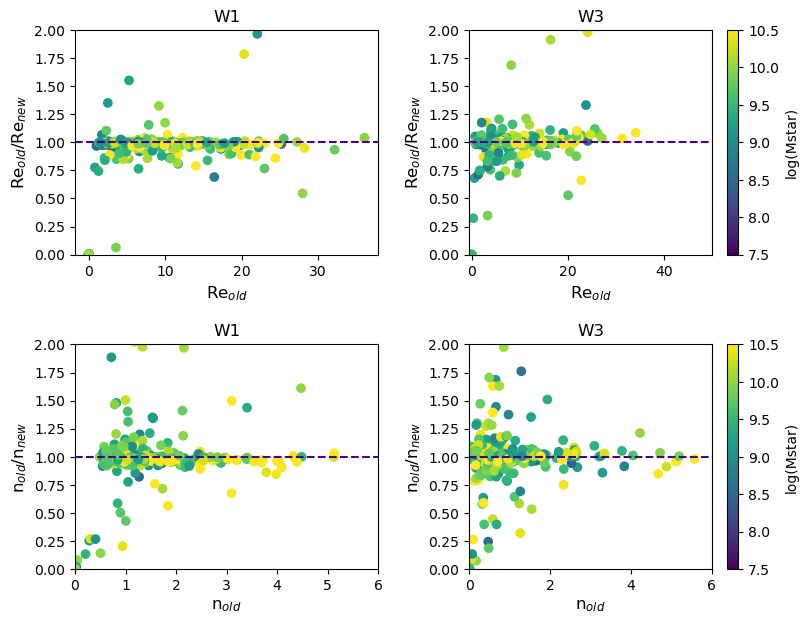

In [153]:
cat.comp_oldnew(zoom=True)

so as of now, you can only do W1 and W3 vs r-band parameters.  this would still be really useful to see, especially b/c we are going to try running with values fixed from the r-band output.  and maybe color code by r-band mag, or stellar mass.
 
if you get the most recent legacy_ephot table from google drive, there is a column GROUP_MULT, which is the number of galaxies in the FOV.  would be good to see these plots for group vs single galaxies, although maybe we don't have the "old" values for group galaxies.

it would be good to see some shape comparisons b/w r and W1, for example, and/or r and W3.  For the majority of the sample, the shapes should be similar.